In [67]:
# %load red_Cell.py
import openpiv.tools
import openpiv.process
import openpiv.scaling
import numpy as np
from skimage import data, io, filter
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import feature
from PIL import Image
from pylab import *
%matplotlib inline
from skimage.color import rgb2gray
from skimage import img_as_uint

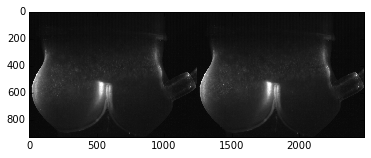

In [68]:
frame_a  = io.imread('/Users/alex/Downloads/1/PIC # 50015.tif')
frame_b  = io.imread('/Users/alex/Downloads/1/PIC # 50016.tif')

# for whatever reason the shape of frame_a is (3, 284, 256)
# so we first tranpose to the RGB image and then convert to the gray scale

# frame_a = img_as_uint(rgb2gray(transpose(frame_a,[1,2,0])))
# frame_b = img_as_uint(rgb2gray(transpose(frame_b,[1,2,0])))


#matshow ( frame_a, cmap=cm.Greys_r )
#mage = data.coins() # or any NumPy array!
io.imshow(np.c_[frame_a,frame_b])

In [69]:
#u, v, sig2noise = openpiv.process.extended_search_area_piv( frame_a, frame_b, window_size=24, overlap=12, dt=0.02, search_area_size=64, sig2noise_method='peak2peak' )
u, v, sig2noise = openpiv.pyprocess.piv( frame_a, frame_b, window_size=32, overlap=8, dt=.1, sig2noise_method='peak2peak' )
x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=32, overlap=8 )

In [70]:
frame_a.dtype

dtype('uint8')

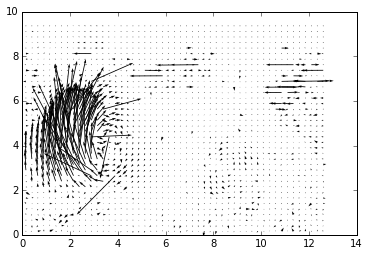

In [71]:
u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v = openpiv.filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = openpiv.scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
quiver(x,y,u,v)

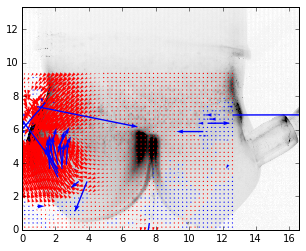

In [88]:
openpiv.tools.save(x, y, u, v, mask, 'tmp.txt' )
openpiv.tools.display_vector_field('tmp.txt', scale=20, width=0.005, window_size = 8, on_img=True,image_name = '/Users/alex/Downloads/1/pic.tif')

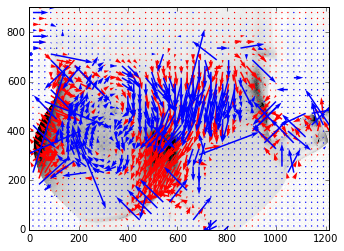

In [149]:
u, v, sig2noise = openpiv.process.extended_search_area_piv(frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=32, overlap = 8, dt=1.0, search_area_size=48, sig2noise_method='peak2peak' )
x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=32, overlap=8 )
u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.07)
u, v = openpiv.filters.replace_outliers( u, v, method='localmean', max_iter=2, kernel_size=1.5)
# x, y, u, v = openpiv.scaling.uniform(x, y, u, v, scaling_factor = 1.0)
openpiv.tools.save(x, y, u, v, mask, 'tmp.txt' )
# openpiv.tools.display_vector_field('tmp.txt', scale=10, width=0.005)
plt.figure(figsize=(16,12))
openpiv.tools.display_vector_field('tmp.txt', scale=100, width=0.005, window_size = True, on_img=True,image_name = '/Users/alex/Downloads/1/pic.tif')


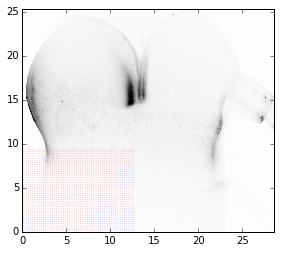

In [74]:
openpiv.tools.display_vector_field('tmp.txt', scale=10000, width=0.0021,window_size = 32, on_img=True,image_name = '/Users/alex/Downloads/1/PIC # 50016.tif')

In [75]:
openpiv.tools.display_vector_field?

In [150]:
openpiv.tools.display_vector_field??

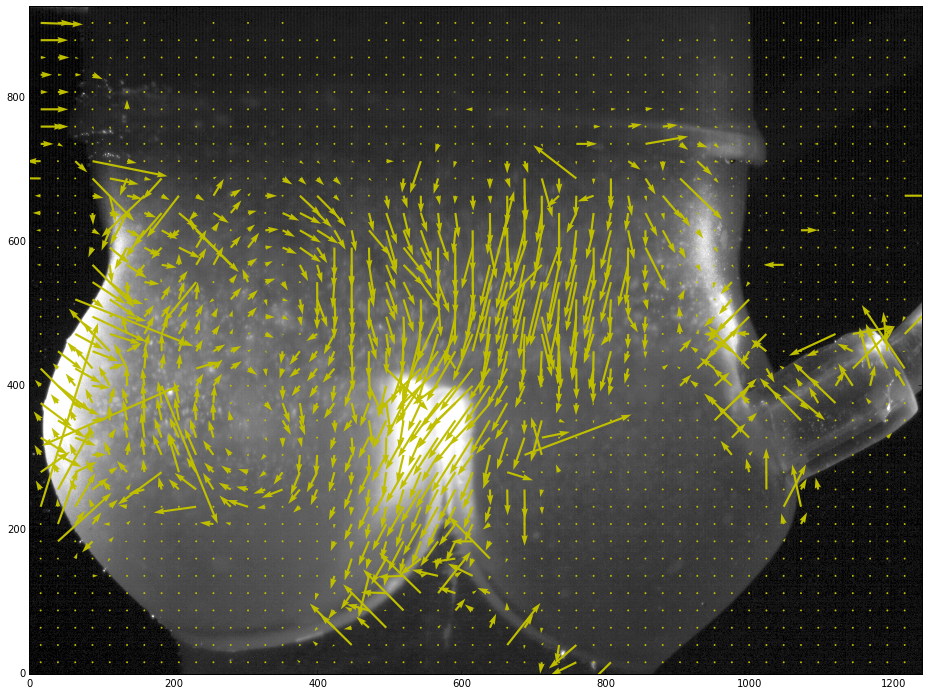

In [158]:
a = np.loadtxt('tmp.txt')
fig=plt.figure(figsize=(16,12))
plt.hold(True)
im = imread('/Users/alex/Downloads/1/pic.tif')
# im = negative(im) #plot negative of the image for more clarity
# imsave('neg.tif', im)
# im = mpltimg.imread('neg.tif')
# xmax=np.amax(a[:,0])+window_size/(2*scaling_factor)
# ymax=np.amax(a[:,1])+window_size/(2*scaling_factor)
implot = plt.imshow(im, origin='lower', cmap="Greys_r")
# invalid = a[:,4].astype('bool')
#fig.canvas.set_window_title('Vector field, '+str(np.count_nonzero(invalid))+' wrong vectors')
# valid = ~invalid
# plt.quiver(a[invalid,0],a[invalid,1],a[invalid,2],a[invalid,3],color='r',**kw)
plt.quiver(a[:,0],a[:,1],a[:,2],a[:,3],color='y')
plt.draw()
plt.show()
plt.savefig('tmp.png',dpi=300)